In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np 
import glob
from scipy import stats
from scipy import misc
import csv

In [2]:
def sort_file_by_first_column(filename):
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
    
    data.sort(key=lambda x: x[0])  # Sort based on the first column
    
    with open(filename, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(data)
        
sort_file_by_first_column("W7-X_B_0_study.txt")        

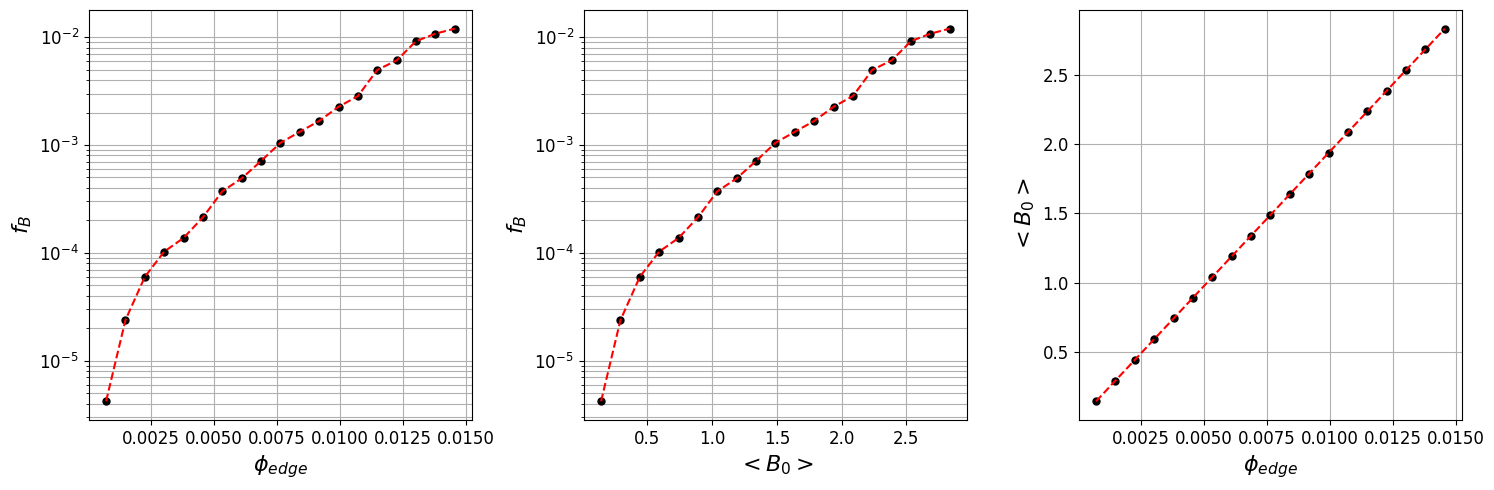

In [3]:
data=pd.read_csv("W7-X_B_0_study.txt", header=None, sep=" ")
data.columns = ["PHIEDGE","B0","f_B"]
PHIEDGE = abs(data["PHIEDGE"])
B0 = data["B0"]
f_B = data["f_B"]

f, ax = plt.subplots(1,3,figsize = (15,5))

ax[0].semilogy(PHIEDGE, f_B, "k.",markersize=10)
ax[0].semilogy(PHIEDGE, f_B, "r--")
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='both', which='minor', labelsize=12)
ax[0].grid(True,which = 'both')
ax[0].set_xlabel(r'$\phi_{edge}$',fontsize=16)
ax[0].set_ylabel(r'$f_B$',fontsize=16, horizontalalignment='right')

ax[1].semilogy(B0, f_B, "k.",markersize=10)
ax[1].semilogy(B0, f_B, "r--")
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='minor', labelsize=12)
ax[1].grid(True,which = 'both')
ax[1].set_xlabel(r'$<B_0>$',fontsize=16)
ax[1].set_ylabel(r'$f_B$',fontsize=16, horizontalalignment='right')

ax[2].plot(PHIEDGE, B0, "k.",markersize=10)
ax[2].plot(PHIEDGE, B0, "r--")
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax[2].tick_params(axis='both', which='minor', labelsize=12)
ax[2].grid(True,which = 'both')
ax[2].set_xlabel(r'$\phi_{edge}$',fontsize=16)
ax[2].set_ylabel(r'$<B_0>$',fontsize=16)
#ax.set_xlim(0,0.40)
#ax.set_ylim(1e-6,1e-2)
plt.tight_layout()
plt.savefig('W7-X_rescaled_PHIEDGE_B0_MSE.png')
plt.show()

In [9]:
path = os.getcwd()
list_folders = [f.path for f in os.scandir(path) if f.is_dir()]
list_folders = [item for item in list_folders if item.split("/")[-1] != "wout_files"]
import re

# Define a custom sorting key using a regular expression to extract PHIEDGE values
def get_phiedge(filename):
    match = re.search(r"PHIEDGE=-([\d.]+)", filename)
    return float(match.group(1)) if match else 0.0

# Sort the list based on the PHIEDGE values
list_folders = sorted(list_folders, key=get_phiedge)
print(list_folders)

B0_list=[]
phi_list=[]
eff_vol_list=[]
MSE_list = []
nmagnets_list=[]

for folder in list_folders:
    B0_path =  glob.glob(os.path.join(folder, "B0_PHIEDGE=*.txt"))[0]
    phi_path =  glob.glob(os.path.join(folder, "phi_PHIEDGE=*.txt"))[0]
    eff_vol_path = glob.glob(os.path.join(folder, "eff_vol_*.txt"))[0]
    MSE_path = glob.glob(os.path.join(folder, "R2history_K*.txt"))[0]
    nmagnets_opt = int(glob.glob(os.path.join(folder,"best_result_m=*.txt"))[0].split(sep="//")[-1].split(sep="=")[-1].split(sep=".")[0])
    
    B0_list.append(np.loadtxt(B0_path))
    phi_list.append(np.loadtxt(phi_path))
    eff_vol_list.append(np.loadtxt(eff_vol_path))
    MSE_list.append(np.loadtxt(MSE_path))
    nmagnets_list.append(nmagnets_opt)
    

['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/W7-X_rescaled_output_PHIEDGE=-0.0007286', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/W7-X_rescaled_output_PHIEDGE=-0.0014976777777777777', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/W7-X_rescaled_output_PHIEDGE=-0.0022667555555555556', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/W7-X_rescaled_output_PHIEDGE=-0.003035833333333333', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/W7-X_rescaled_output_PHIEDGE=-0.0038049111111111114', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/W7-X_rescaled_output_PHIEDGE=-0.004573988888888889', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/W7-X_rescaled_output_PHIEDGE=-0.005343066666666666', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/W7-X_rescaled_output_PHIEDGE=-0.006112144444444445', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/W7-X_rescaled_output_PHIEDGE=-0.006881222222222222', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QI/W7-X_rescaled_output_PHIEDGE=-0.00765030

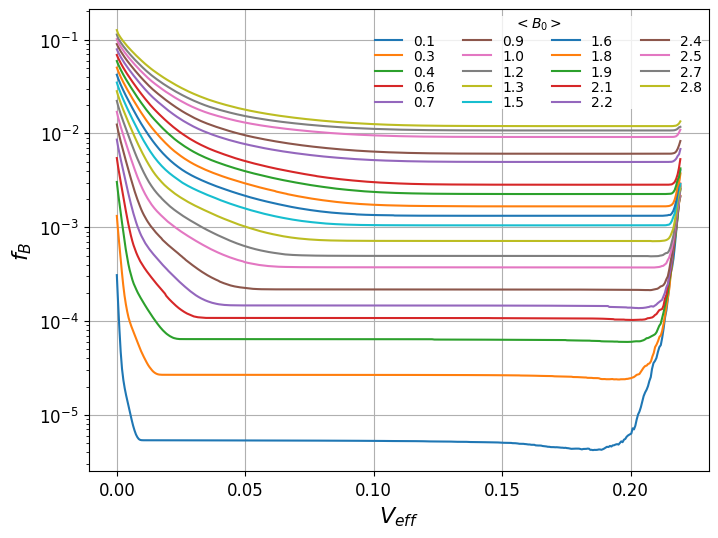

In [10]:
plt.figure(figsize=(8,6))

for i in range(len(eff_vol_list)):
    plt.semilogy(eff_vol_list[i][:-95],MSE_list[i][:-95])
    
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$V_{eff}$',fontsize=16)
plt.ylabel(r'$f_B$',fontsize=16, horizontalalignment='right')
leg = plt.legend(round(B0,1),title=r"$<B_0>$",ncol=4,loc="upper right",labelspacing = 0.1,fontsize=10,borderpad=0.0)
leg.get_frame().set_linewidth(0.0)

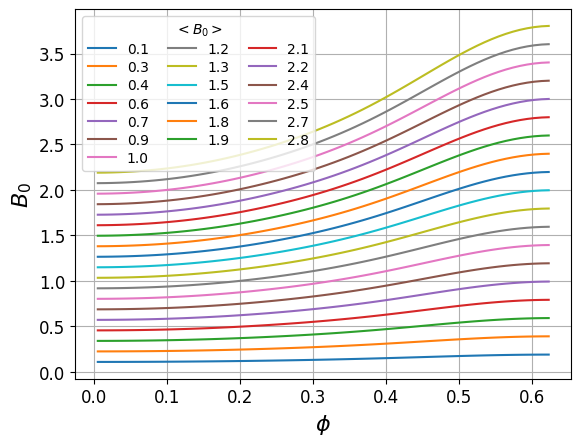

In [11]:
plt.figure()

for i in range(len(B0_list)):
    plt.plot(phi_list[i],B0_list[i])
    
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$\phi$',fontsize=16)
plt.ylabel(r'$B_0$',fontsize=16)
plt.legend(round(B0,1),title=r"$<B_0>$",ncol=3,labelspacing=0.3,columnspacing=1.4)

Text(0, 0.5, 'Optimized $V_{eff}$')

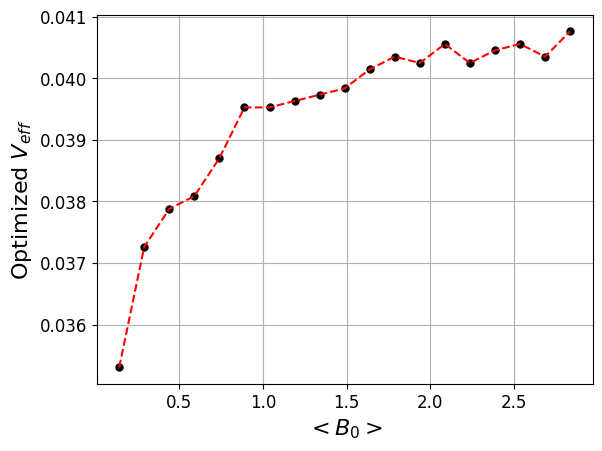

In [12]:
nfp=2
mu0 = 4 * np.pi * 1e-7
Bmax = 1.465
vol_eff_opt = []
for x in nmagnets_list:
    vol_eff_opt.append(x * mu0 * 2 * nfp / Bmax) 
#np.savetxt("vol_eff_opt.txt",vol_eff_opt)
plt.figure()

plt.plot(B0,vol_eff_opt, "k.",markersize=10)
plt.plot(B0,vol_eff_opt, "r--")
    
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$<B_0>$',fontsize=16)
plt.ylabel(r'Optimized $V_{eff}$',fontsize=16)

/home/madeira/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:1239: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/madeira/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/madeira/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:1240: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/madeira/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/madeira/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:1241: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/madeira/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:1247: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(s

(-0.025, 0.025)

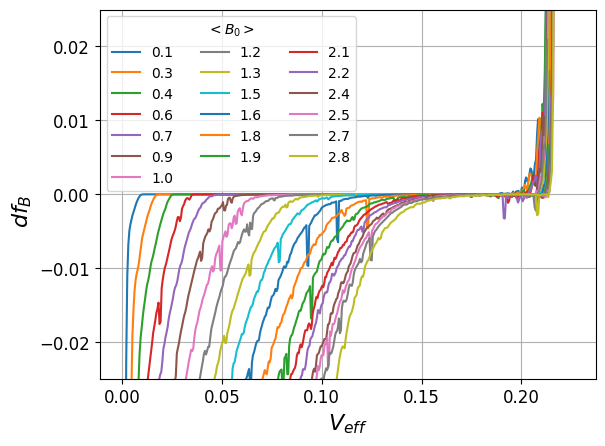

In [13]:
plt.figure()

for i in range(len(eff_vol_list)):
    plt.plot(eff_vol_list[i],np.gradient(MSE_list[i],eff_vol_list[i]))
    
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$V_{eff}$',fontsize=16)
plt.ylabel(r'$df_B$',fontsize=16, horizontalalignment='right')
plt.legend(round(B0,1),title=r"$<B_0>$",ncol=3)
plt.ylim(-0.025,0.025)

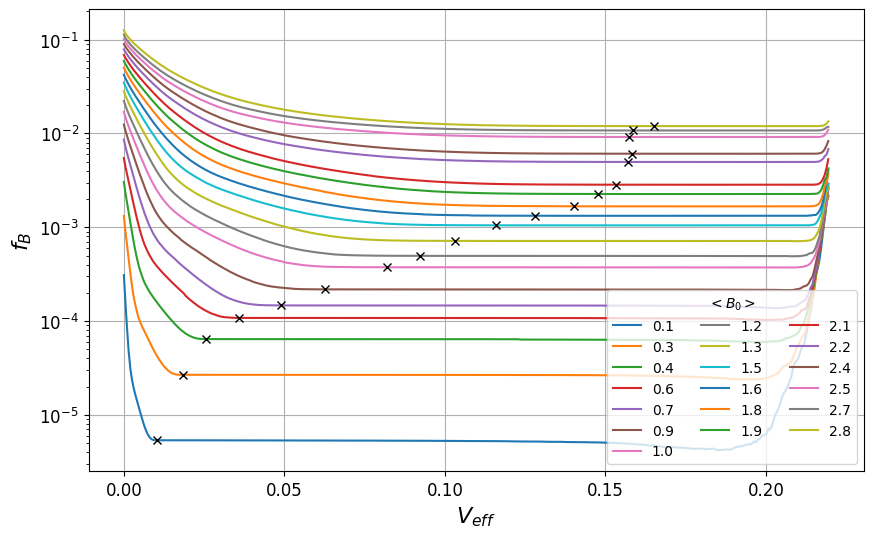

In [15]:
plateau_start_list=[]
plateau_start_MSE = []
plateau_start_V_eff  = []

dr = 0.02
R0 = 0.46
epselon = 10.7509452402522
R1=R0/epselon

for i in range(len(eff_vol_list)):
    derivada = np.gradient(MSE_list[i],eff_vol_list[i])
    for j in range(len(MSE_list[i])):
        if(abs(derivada[j]) < 1e-6*B0[i]**2/(dr)): #0.5e-6
            plateau_start_list.append(j)
            plateau_start_MSE.append(MSE_list[i][j])
            plateau_start_V_eff.append(eff_vol_list[i][j])
            break
        
plt.figure(figsize=(10,6))

for i in range(len(eff_vol_list)):
    plt.semilogy(eff_vol_list[i][:-95],MSE_list[i][:-95])
plt.semilogy(plateau_start_V_eff,plateau_start_MSE, "kx",label="")
    
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$V_{eff}$',fontsize=16)
plt.ylabel(r'$f_B$',fontsize=16)
plt.legend(round(B0,1),title=r"$<B_0>$",ncol=3,loc = "lower right")
#np.savetxt("vol_eff_plateau.txt",plateau_start_V_eff)

Text(0, 0.5, '$V_{eff}$')

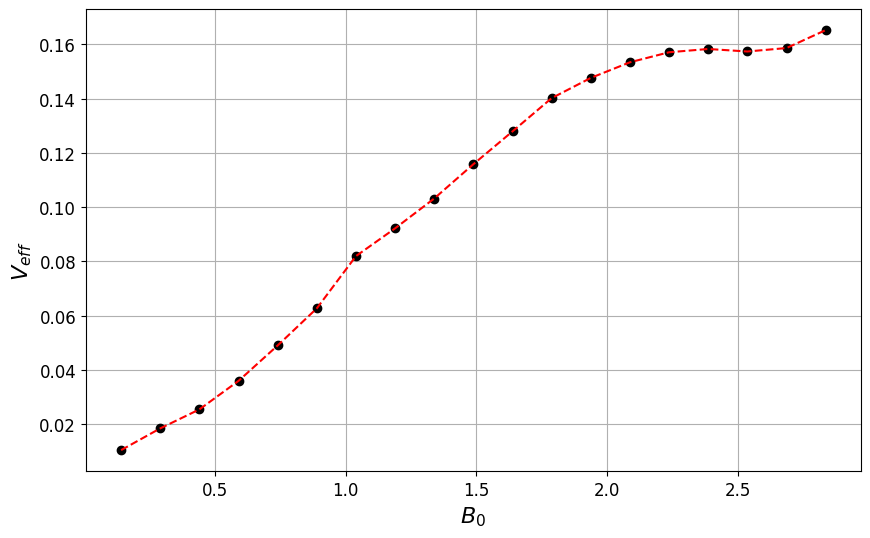

In [16]:
plt.figure(figsize=(10,6))

plt.plot(B0,plateau_start_V_eff, "ko")    
plt.plot(B0,plateau_start_V_eff, "r--") 
   
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$B_0$',fontsize=16)
plt.ylabel(r'$V_{eff}$',fontsize=16, horizontalalignment='right')